Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria das Vibrações


### Trabalho 2.2

#### Aluno: Rodrigo Escolante Pereira
#### Cartão: 195492

[1.   Objetivos](#section_1)  
[2.   Modelo](#section_2)  
[3.   Resultados](#section_3)  
    [3.1. Frequências naturais e modos de vibração](#section_31)  
    [3.2. Impacto](#section_32)  
    [3.3. Amortecimento](#section_33)  
[4. Conclusões](#section_4)  



## 1. Objetivos <a name="section_1"></a> 

O objetivo deste trabalho é a obtenção do deslocamento máximo em uma estrutura com múltiplos graus de liberdade, considerando um impacto que atinja alguma das frequências naturais do modelo apresentado. 

## 2. Modelo <a name="section_2"></a> 



O modelo consiste em uma viga treliçada com comprimento de 42 metros e altura equivalente a 3 m realizado no _software FTOOL_. Foi considerado um perfil metálico I para a seção transversal das barras. A figura abaixo resume o modelo:

<img src="images/MODELO.png" alt="MODELO" width="720px"/>

Para extração da matriz de rigidez da estrutura foi necessário primeiramente obter sua matriz de flexibilidade. Isso foi realizando aplicando uma carga nodal de 10𝐾𝑁 em diferentes posições sobre os nós da parte superior da viga, os quais representam os graus de liberdade principais do modelo. Para cada nó carregado, anota-se o deslocamento vertical de todos os nós da estrutura. Ao final, obtém-se uma matriz de deslocamentos que dividida pelo módulo da carga aplicada conduz à matriz de flexibilidade da estrutura,H1. Nesta matriz cada coluna representa o deslocamento de um nó considerando um carregamento unitário sob diferentes posições da viga. A matriz K1 ou matriz de rigidez é a inversa da matriz de flexibilidade H1. Para consideração da massa, foi elaborada uma matriz de massa do tipo _lumped_, 𝑀1, cuja diagonal principal contém a massa concentrada nos graus de liberdade principais da estrutura. Para tanto, foi atribuído uma carga de 100Kg/m sobre a viga, apresentando cada nó uma massa concentrada de 300Kg.De posse de k1 e M1, determina-se a menor frequência natural da estrutura, bem como seu auto-vetor associado e esboça-se o mesmo. 

### 3. Resultados <a name="section_3"></a>

#### 3.1. Frequências e modos de vibração <a name="section_31"></a>

Através da matriz de flexibilidade H1 elaborada por meio das medições realizadas no modelo do _FTOOL_, determina-se a matriz de rigidez, K1. Sob posse de K1 e da matriz de massa _lumped_ M1, soluciona-se um problema de autovalores, sendo as frequências naturais os autovalores e os modos de vibração, os autovetores associados da estrutura. O código abaixo, utilizando a classe _scipy_ da linguagem _Python_ demonstra os cálculos realizados.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sp

#matriz de deslocamentos do modelo
H1 = np. array ([[0.690, 1.100, 1.380, 1.580, 1.680, 1.690, 1.640, 1.520, 1.350, 1.140, 0.880, 0.600, 0.310], 
  [1.100, 2.140, 2.670, 3.060, 3.270, 3.320, 3.220, 3.000, 2.660, 2.240, 1.740, 1.190, 0.600], 
  [1.380, 2.670, 3.760, 4.370, 4.700, 4.800, 4.670, 4.360, 3.880, 3.270, 2.540, 1.740, 0.880], 
  [1.580, 3.060, 4.370, 5.460, 5.890, 6.060, 5.930, 5.550, 4.960, 4.190, 3.270, 2.240, 1.140], 
  [1.680, 3.270, 4.700, 5.890, 6.750, 7.030, 6.940, 6.540, 5.860, 4.960, 3.880, 2.660, 1.350], 
  [1.690, 3.320, 4.800, 6.060, 7.030, 7.700, 7.630, 7.250, 6.540, 5.550, 4.360, 3.000, 1.520], 
  [1.640, 3.220, 4.670, 5.930, 6.940, 7.630, 7.940, 7.630, 6.940, 5.930, 4.670, 3.220, 1.640], 
  [1.520, 3.000, 4.360, 5.550, 6.540, 7.250, 7.630, 7.700, 7.030, 6.060, 4.800, 3.320, 1.690], 
  [1.350, 2.660, 3.880, 4.960, 5.860, 6.540, 6.940, 7.030, 6.750, 5.890, 4.700, 3.270, 1.680], 
  [1.140, 2.240, 3.270, 4.190, 4.960, 5.550, 5.930, 6.060, 5.890, 5.460, 4.370, 3.060, 1.580], 
  [0.880, 1.740, 2.540, 3.270, 3.880, 4.360, 4.670, 4.800, 4.700, 4.370, 3.760, 2.670, 1.380], 
  [0.600, 1.190, 1.740, 2.240, 2.660, 3.000, 3.220, 3.320, 3.270, 3.060, 2.670, 2.140, 1.100], 
  [0.310, 0.600, 0.880, 1.140, 1.350, 1.520, 1.640, 1.690, 1.680, 1.580, 1.380, 1.100, 0.690]])*1e-6 

#matriz de rigidez da estrutura
K1 = np.linalg.inv(H1)

#matriz de massa lumped
M1 = np.array ([[300 , 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0 ],
              [0 , 300, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0 ],
              [0 , 0, 300, 0, 0, 0, 0, 0, 0, 0,0,0,0 ],
              [0 , 0, 0, 300, 0, 0, 0, 0, 0, 0,0,0,0 ],
              [0 , 0, 0, 0, 300, 0, 0, 0, 0, 0,0,0,0 ],
              [0 , 0, 0, 0, 0, 300, 0, 0, 0, 0,0,0,0 ],
              [0 , 0, 0, 0, 0, 0, 300, 0, 0, 0,0,0,0 ],
              [0 , 0, 0, 0, 0, 0, 0, 300, 0, 0,0,0,0 ],
              [0 , 0, 0, 0, 0, 0, 0, 0, 300, 0,0,0,0 ],
              [0 , 0, 0, 0, 0, 0, 0, 0, 0, 300,0,0,0 ],
              [0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 300,0,0 ],
              [0 , 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 300,0 ],
              [0 , 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0, 300 ]])

#Obtenção dos autovalores
# Uses scipy to solve the standard eigenvalue problem
w2, phi1 = sp.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w2.argsort()
w2  = w2[iw]
Phi1 = phi1[:,iw]
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi
print (fk1)

[ 1.24850835  4.49980929  9.99558856 13.02873293 17.13732383 17.13732383
 20.32952768 27.17696427 27.17696427 30.40018301 32.38016737 32.38016737
 32.70365735]


Como se observa acima, a menor frequência de vibração é da ordem de 1,24 Hz e a máxima é de 32,70 Hz. A seguir são apresentados os 4 primeiros modos de vibração do modelo:

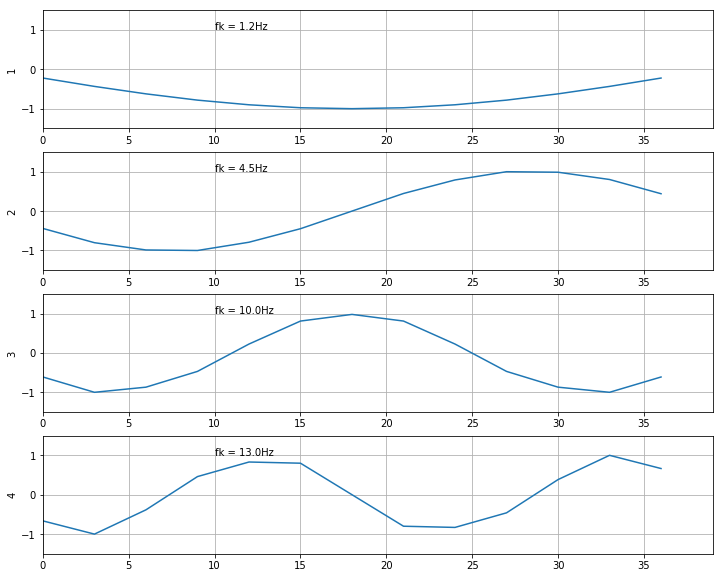

In [64]:
plt.figure(1, figsize=(12,10))
x = np.arange(0,39,3)

for k in range(4):
    pk = np.zeros(13)
    pk[:] = Phi1[:,k]
    pk /= np.max(np.abs(pk))
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 39);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

#### 3.2. Impacto <a name="section_32"></a>

Considerando um impacto de uma carga de 10 KN em um período de tempo, $Td = T/4$, onde T é o menor período de tempo associado a maior frequência natural da estrutura. Calcula-se então uma velocidade inicial, $vo$, que corresponderia a esse impacto.

In [65]:
fmax = np.max(fk1)
F = 10000
Tn = 1/fmax     #vetor de tempo
Td = Tn/4       # frequência natural em Hz
m = 300
vo = F*Td/m
print ('Tn: ',Tn)
print ('Td: ',Td)
print ('vo: ',vo)

Tn:  0.030577619787473274
Td:  0.007644404946868319
vo:  0.25481349822894395


Considerando um deslocamento inicial, $u_0$, nulo, deseja-se determinar o deslocamento máximo em um grau de liberdade da estrutura. Para este trabalho foi adotado o nó 7 equivalente ao centro da viga. O ângulo de fase considerado foi o de $\pi/2$, por representar o que fornece o $u_{max}$. A seguir será apresentado o cálculo do ângulo de fase e do deslocamento máximo no nó 7, considerando todos os modos de vibração da estrutura.

In [66]:
angulo = np.pi/2 #angulo de fase
U = np.zeros (13) #vetor para armazenar os deslocamentos máximos de cada modo de vibração
vi = np.zeros(13) #vetor de velocidades iniciais
vi[7] = vo
for k in range (13):
    
    Mi = np.dot(np.dot(Phi1[k].transpose(),M1),Phi1[k])
    umax = np.dot(np.dot(Phi1[k].transpose(),M1),vi)/(wk1[k]*np.sin(angulo)*Mi) #armazena a amplitude máxima de cada modo de vibração
    U[k] = umax

t = np.linspace (0,10,1000) #vetor de tempo
d = np.zeros ((13,1000)) #matriz de deslocamentos

for k in range (13):
  
  d[k,:] = U[k]*np.cos(-wk1[k]*t -angulo)
    
u = np.dot(Phi1,d) #produto modos de vibração pela matriz de deslocamentos
print ('Deslocamento máximo nó 7 (m):', np.max(u))

Deslocamento máximo nó 7 (m): 0.005066107265951823


O gráfico abaixo demonstra os deslocamentos ao longo do tempo para o nó considerado:

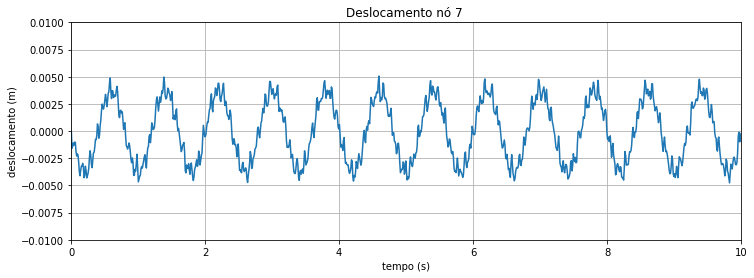

In [67]:
plt.figure (5, figsize =(12,4))
plt.plot(t,u[7,:]) #deslocamento no nó central da viga
plt.xlim( 0, 10);
plt.ylim(-0.01,  0.01);  
plt.title ('Deslocamento nó 7 ')
plt.xlabel('tempo (s)');
plt.ylabel('deslocamento (m)');
plt.grid(True)

  #### 3.3.Amortecimento <a name="section_33"></a>

Para o amortecimento utiliza-se o método de Rayleigh, cuja matriz de amortecimento é a combinação linear das matrizes M1 e K1. Afim de terminar os valores de $\zeta$, estima-se um amortecimento inicial de 1% para os valores de $\alpha_1$ e   $\alpha_2$. Os cálculos abaixo demonstram o vetor de amortecimento $\zeta$ calculado.

In [68]:
zeta = np.zeros (13)
zeta[0] = 0.01
zeta [1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0] - alfa1*wk1[1]**2

for k in range (11):
    
    zeta[k+2] = (alfa0/(2*wk1[k+2])) + (alfa1*wk1[k+2]/2)
    
print ('alfa0: ', alfa0)
print ('alfa1: ', alfa1)    
print ('zeta: ', zeta)

alfa0:  -0.28575460584409657
alfa1:  0.0005537444278697373
zeta:  [0.01       0.01       0.01511375 0.02091995 0.02848586 0.02848586
 0.0342475  0.04644139 0.04644139 0.05213735 0.05562755 0.05562755
 0.05619725]


### 4. Conclusões <a name="section_4"></a>

Este trabalho apresentou os procedimentos utilizados para a determinação das frequências naturais e seus modos de vibração associados. Também foi apresentado os deslocamentos máximos para o nó 7, central do modelo de viga elaborado no _FTOOL_, considerando todos os modos de vibração da estrutura e um impacto neste nó com uma força de 10 KN sob uma duração de 0,007 segundos. Por fim, calculou-se o amortecimento pelo método de Rayleigh para as frequências naturais da estrutura.